# North York Rise and Grind

## Exploring North York Borough

In [333]:
#Import Libraries and dependencies
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### Get the postal code data and geospatial data

### Wiki Postal Codes of Canada

In [334]:
#import wiki page to explore the postal codes of Canada

import urllib.request

url= "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup

soup = BeautifulSoup(page, "lxml")

all_tables=soup.find_all("table")

right_table=soup.find('table', class_='wikitable sortable')


In [335]:
#create containers for the table

A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        
#add the data to the table

df_postal=pd.DataFrame(A,columns=['Postal_Code'])
df_postal['Borough']=B
df_postal['Neighborhood']=C

#output the columns that were imported and the index values
print(df_postal.columns.values)
print(df_postal.index.values)

['Postal_Code' 'Borough' 'Neighborhood']
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]


In [336]:
df_postal.columns.tolist()
df_postal.index.tolist()
print (type(df_postal.columns.tolist()))
print (type(df_postal.index.tolist()))

<class 'list'>
<class 'list'>


In [337]:
#drop the values for Borough's not assigned

df_postal.drop(df_postal[df_postal['Borough'] =="Not assigned\n"].index, inplace=True)

#grouped by postal code, borough and neignborhood

df_postal_group = df_postal[['Postal_Code', 'Borough', 'Neighborhood']]
df_postal_group.head()

,Postal_Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [338]:
#print dataframe shape

df_postal.shape

(103, 3)

### Geospatial Coordinates

In [339]:
#get csv file

!wget -q -O 'Geospatial_Coordinates.csv' https://cocl.us/Geospatial_data

#download csv file

df_geo = pd.read_csv ('Geospatial_Coordinates.csv') 
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [340]:
#rename Postal Code column to match with the Canada table

df_geo.rename(columns ={"Postal Code": "Postal_Code"}, inplace = True)


In [341]:
# check dattypes for both tables

print(df_postal.dtypes)
print(df_geo.dtypes)

Postal_Code     object
Borough         object
Neighborhood    object
dtype: object
Postal_Code     object
Latitude       float64
Longitude      float64
dtype: object


In [342]:
df_geo.columns.values
df_geo.index.values
df_geo.columns.tolist()
df_geo.index.tolist()
print (type(df_geo.columns.tolist()))
print (type(df_geo.index.tolist()))

<class 'list'>
<class 'list'>


In [343]:
# remove the newslines '\n' from all fields in the postal data:

df_postal['Postal_Code']=df_postal['Postal_Code'].str.join('').str.replace(r"\n", "")
df_postal['Borough']=df_postal['Borough'].str.join('').str.replace(r"\n", "")
df_postal['Neighborhood']=df_postal['Neighborhood'].str.join('').str.replace(r"\n", "")

## Merge the Wiki Canada Neighborhood data with the Geospatial Latitude and Longitude data to make one table

In [344]:
#merge dataset

df_postal_group = pd.merge(df_postal, df_geo, on='Postal_Code')

df_postal_group.head()

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [345]:
#group the data by Borough

df_postal_group = df_postal_group[['Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df_postal_group.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## North York Borough Data

#### My interest is in bringing a brunch restaurant to the North York Borough.  North York is a cross-section of inhabitants which includes students and long-time residents, giving the city an eclectic feeling of being both local and international.  My new restaurant - North York Rise and Grind is targeted for this community.  The goal is to now find the best neighborhood in North York.

In [346]:
#query for North York Borough

df_northyork = df_postal_group[df_postal_group['Borough'] == 'North York']
df_northyork


,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
7,North York,Don Mills,43.745906,-79.352188
10,North York,Glencairn,43.709577,-79.445073
13,North York,Don Mills,43.725900,-79.340923
27,North York,Hillcrest Village,43.803762,-79.363452
28,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
33,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
34,North York,"Northwood Park, York University",43.767980,-79.487262


### Create a map of North York

In [350]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [353]:
address = 'North York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.77
longitude = -79.46
print(latitude, longitude)

43.77 -79.46


In [354]:
# create map of North York using its latitude and longitude values

map_northyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map

for lat, lng, borough, neighborhood in zip(df_northyork['Latitude'], df_northyork['Longitude'], df_northyork['Borough'], df_northyork['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_northyork)  
    
map_northyork

In [ ]:
Amesbury
Armour Heights
Bathurst Manor
Bayview Village
Bayview Woods-Steeles
Bermondsey
Black Creek
The Bridle Path
Clanton Park (Wilson Heights)
Don Mills
Don Valley Village
Downsview
Flemingdon Park
Glen Park (Yorkdale – Glen Park; Englemount; Marlee Village)
Henry Farm
Hillcrest Village
Hoggs Hollow
Humber Summit
Humbermede (Emery)
Jane and Finch (University Heights; Elia)
Lansing
Lawrence Heights
Lawrence Manor
Ledbury Park
Maple Leaf
Newtonbrook
North York City Centre
Parkway Forest
Parkwoods
The Peanut
Pelmo Park – Humberlea
Pleasant View
Uptown Toronto
Victoria Village
Westminster–Branson
Willowdale
York Mills
York University Heights (Village at York)

North York City Centre in 2015


## Dig deeper into North York

#### Lets pull some statistical data on the population of North York neighborhoods

## North York Neighborhoods

#### I pulled statistical data on all Toronto neighborhoods using Json

In [299]:
import pandas as pd
import requests
 
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
 
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "6e19a90f-971c-46b3-852c-0c48c436d1fc"}
package = requests.get(url, params = params).json()
print(package["result"])
 
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
 
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        toronto = pd.DataFrame(data["result"]["records"])
        break
toronto.head()

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'City government,Community services,Locations and mapping', 'owner_email': 'opendata@toronto.ca', 'excerpt': 'The Neighbourhood Profiles provide a portrait of the demographic, social and economic characteristics of the people and households in each City of Toronto neighbourhood. The data is based on tabulations of 2016 Census of Population data from Statistics Canada.', 'private': False, 'owner_division': 'Social Development, Finance & Administration', 'num_tags': 15, 'id': '6e19a90f-971c-46b3-852c-0c48c436d1fc', 'metadata_created': '2019-07-23T17:47:12.629378', 'refresh_rate': 'As available', 'title': 'Neighbourhood Profiles', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/', 'license_id': 'open-government-licence-toronto', 'type': 'da

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Category,Centennial Scarborough,Characteristic,Church-Yonge Corridor,City of Toronto,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Data Source,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,L'Amoreaux,Lambton Baby Point,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,O'Connor-Parkview,Oakridge,Oakwood Village,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Topic,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,_id
0,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,Neighbourhood Information,133,Neighbourhood Number,75,n/a,120,33,123,92,66,59,City of Toronto,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,117,114,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,54,121,107,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,Neighbourhood Information,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31,1
1,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Neighbourhood Information,No Designation,TSNS2020 Designation,No Designation,n/a,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,City of Toronto,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designati

### North York Neighborhoods

In [301]:
northyork_neigh=toronto[['_id','Characteristic','Bathurst Manor','Bayview Village','Bayview Woods-Steeles','Clanton Park','Don Valley Village',
                         'Flemingdon Park','Henry Farm','Hillcrest Village','Humber Summit','Humbermede','Lansing-Westgate',
                         'Lawrence Park North','Lawrence Park South','Maple Leaf','Newtonbrook East','Newtonbrook West','Victoria Village','Westminster-Branson',
                         'Willowdale East','Willowdale West','York University Heights']]
northyork_neigh

,_id,Characteristic,Bathurst Manor,Bayview Village,Bayview Woods-Steeles,Clanton Park,Don Valley Village,Flemingdon Park,Henry Farm,Hillcrest Village,Humber Summit,Humbermede,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Maple Leaf,Newtonbrook East,Newtonbrook West,Victoria Village,Westminster-Branson,Willowdale East,Willowdale West,York University Heights
0,1,Neighbourhood Number,34,52,49,33,47,44,53,48,21,22,38,105,103,29,50,36,43,35,51,37,27
1,2,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA
2,3,"Population, 2016","15,873","21,396","13,154","16,472","27,051","21,933","15,723","16,934","12,416","15,545","16,164","14,607","15,179","10,111","16,097","23,831","17,510","26,274","50,434","16,936","27,593"
3,4,"Population, 2011","15,434","17,671","13,530","14,612","26,739","22,168","11,333","17,656","12,525","15,853","14,642","14,541","15,070","10,197","16,423","23,052","17,182","25,446","45,041","15,004","27,713"
4,5,Population Change 2011-2016,2.80%,21.10%,-2.80%,12.70%,1.20%,-1.10%,38.70%,-4.10%,-0.90%,-1.90%,10.40%,0.50%,0.70%,-0.80%,-2.00%,3.40%,1.90%,3.30%,12.00%,12.90%,-0.40%
5,6,Total private dwellings,"6,418","10,111","4,895","6,881","10,196","7,964","6,646","6,642","4,288","5,390","6,943","5,622","6,017","3,696","6,470","9,416","7,562","10,454","23,901","8,054","11,051"
6,7,Private dwellings occupied by usual residents,"6,089","9,532","4,698","6,554","9,968","7,830","6,362","6,398","3,897","5,052","6,588","5,418","5,749","3,556","6,114","8,960","7,412","10,234","22,304","7,549","10,170"
7,8,Population density per square kilometre,"3,377","4,195","3,240","3,979","6,441","9,026","6,047","3,148","1,570","3,565","3,038","6,407","4,685","4,012","3,926","5,070","3,710","7,339","10,087","5,820","2,086"
8,9,Land area in square kilometres,4.7,5.1,4.06,4.14,4.2,2.43,2.6,5.38,7.91,4.36,5.32,2.28,3.24,2.52,4.1,4.7,4.72,3.58,5,2.91,13.23
9,10,Children (0-14 years),"2,325","2,415","1,515","2,765","4,065","4,385","2,505","2,115","2,155","2,945","2,420","3,280","2,845","1,500","1,585","2,810","2,630","3,440","5,920","1,785","4,045"


In [302]:
#drop id column and rename Characteristic to Neighborhood for consistency
northyork_neigh.rename(columns ={"Characteristic": "Neighborhood"}, inplace = True)
northyork_neighb = northyork_neigh.drop(columns=['_id'])

northyork_neighb.head()

,Neighborhood,Bathurst Manor,Bayview Village,Bayview Woods-Steeles,Clanton Park,Don Valley Village,Flemingdon Park,Henry Farm,Hillcrest Village,Humber Summit,Humbermede,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Maple Leaf,Newtonbrook East,Newtonbrook West,Victoria Village,Westminster-Branson,Willowdale East,Willowdale West,York University Heights
0,Neighbourhood Number,34,52,49,33,47,44,53,48,21,22,38,105,103,29,50,36,43,35,51,37,27
1,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA
2,"Population, 2016","15,873","21,396","13,154","16,472","27,051","21,933","15,723","16,934","12,416","15,545","16,164","14,607","15,179","10,111","16,097","23,831","17,510","26,274","50,434","16,936","27,593"
3,"Population, 2011","15,434","17,671","13,530","14,612","26,739","22,168","11,333","17,656","12,525","15,853","14,642","14,541","15,070","10,197","16,423","23,052","17,182","25,446","45,041","15,004","27,713"
4,Population Change 2011-2016,2.80%,21.10%,-2.80%,12.70%,1.20%,-1.10%,38.70%,-4.10%,-0.90%,-1.90%,10.40%,0.50%,0.70%,-0.80%,-2.00%,3.40%,1.90%,3.30%,12.00%,12.90%,-0.40%


### Only need Population data

In [304]:
#pull only needed rows

northyork_neighb=(northyork_neighb.loc[toronto['_id'].isin ([1,3,4,5,12,58,59,60,61,62,63,64,65,66,67,67])])
northyork_neighb.head()

,Neighborhood,Bathurst Manor,Bayview Village,Bayview Woods-Steeles,Clanton Park,Don Valley Village,Flemingdon Park,Henry Farm,Hillcrest Village,Humber Summit,Humbermede,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Maple Leaf,Newtonbrook East,Newtonbrook West,Victoria Village,Westminster-Branson,Willowdale East,Willowdale West,York University Heights
0,Neighbourhood Number,34,52,49,33,47,44,53,48,21,22,38,105,103,29,50,36,43,35,51,37,27
2,"Population, 2016","15,873","21,396","13,154","16,472","27,051","21,933","15,723","16,934","12,416","15,545","16,164","14,607","15,179","10,111","16,097","23,831","17,510","26,274","50,434","16,936","27,593"
3,"Population, 2011","15,434","17,671","13,530","14,612","26,739","22,168","11,333","17,656","12,525","15,853","14,642","14,541","15,070","10,197","16,423","23,052","17,182","25,446","45,041","15,004","27,713"
4,Population Change 2011-2016,2.80%,21.10%,-2.80%,12.70%,1.20%,-1.10%,38.70%,-4.10%,-0.90%,-1.90%,10.40%,0.50%,0.70%,-0.80%,-2.00%,3.40%,1.90%,3.30%,12.00%,12.90%,-0.40%
11,Working Age (25-54 years),"6,655","10,310","4,490","7,470","11,860","9,185","8,045","6,060","4,855","6,445","7,590","5,980","5,870","4,110","6,860","10,410","7,170","10,865","25,850","7,480","12,290"


### Transpose the dataset 

In [305]:
#transpose
neighborhood = northyork_neighb.set_index('Neighborhood').transpose()

neighborhood.head()

Neighborhood,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Working Age (25-54 years),Occupied private dwellings by structural type of dwelling,Single-detached house,Apartment in a building that has five or more storeys,Other attached dwelling,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,Other single-attached house,Movable dwelling
Bathurst Manor,34,"15,873","15,434",2.80%,"6,655",6080,2105,2055,1925,165,45,640,1070,15,0
Bayview Village,52,"21,396","17,671",21.10%,"10,310",9535,2025,5900,1610,120,880,75,520,5,0
Bayview Woods-Steeles,49,"13,154","13,530",-2.80%,"4,490",4700,1565,1775,1365,495,200,100,570,0,0
Clanton Park,33,"16,472","14,612",12.70%,"7,470",6550,2405,2315,1830,10,15,555,1255,10,5
Don Valley Village,47,"27,051","26,739",1.20%,"11,860",9975,2120,5630,2215,360,1415,145,305,0,0


## North York Data Analysis

### Population Data set

#### The population growth will give me the necessary information needed to make a decision

In [221]:
neighborhood.shape

(21, 15)

In [306]:
neighborhood.head()

Neighborhood,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Working Age (25-54 years),Occupied private dwellings by structural type of dwelling,Single-detached house,Apartment in a building that has five or more storeys,Other attached dwelling,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,Other single-attached house,Movable dwelling
Bathurst Manor,34,"15,873","15,434",2.80%,"6,655",6080,2105,2055,1925,165,45,640,1070,15,0
Bayview Village,52,"21,396","17,671",21.10%,"10,310",9535,2025,5900,1610,120,880,75,520,5,0
Bayview Woods-Steeles,49,"13,154","13,530",-2.80%,"4,490",4700,1565,1775,1365,495,200,100,570,0,0
Clanton Park,33,"16,472","14,612",12.70%,"7,470",6550,2405,2315,1830,10,15,555,1255,10,5
Don Valley Village,47,"27,051","26,739",1.20%,"11,860",9975,2120,5630,2215,360,1415,145,305,0,0


In [307]:
pop_change= neighborhood.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [3]]
pop_change              

Neighborhood,Population Change 2011-2016
Bathurst Manor,2.80%
Bayview Village,21.10%
Bayview Woods-Steeles,-2.80%
Clanton Park,12.70%
Don Valley Village,1.20%
Flemingdon Park,-1.10%
Henry Farm,38.70%
Hillcrest Village,-4.10%
Humber Summit,-0.90%
Humbermede,-1.90%


### Group Data by Population Change

In [308]:
#put the population percent change into groups 

def label_growth (row):
    if row['Population Change 2011-2016'] in ['-4.10%', '-2.80%', '-1.10%', '-1.90%', '-2.00%', '-0.40%', '-0.80%', '-0.90%']:
        return 'Negative Growth'
    if row['Population Change 2011-2016'] in ['2.80%', '1.20%', '0.50%', '0.70%', '3.40%', '1.90%', '3.30%']:
        return 'Small Growth'
    if row['Population Change 2011-2016'] in ['12.70%', '10.40%', '12.00%', '12.90%']:
        return 'Moderate Growth'
    return 'High Growth'

pop_change['Pop_Growth'] = pop_change.apply(lambda row: label_growth(row), axis=1)

pop_change


Neighborhood,Population Change 2011-2016,Pop_Growth
Bathurst Manor,2.80%,Small Growth
Bayview Village,21.10%,High Growth
Bayview Woods-Steeles,-2.80%,Negative Growth
Clanton Park,12.70%,Moderate Growth
Don Valley Village,1.20%,Small Growth
Flemingdon Park,-1.10%,Negative Growth
Henry Farm,38.70%,High Growth
Hillcrest Village,-4.10%,Negative Growth
Humber Summit,-0.90%,Negative Growth
Humbermede,-1.90%,Negative Growth


In [309]:
#reset index

pop_growth = pop_change.reset_index()
pop_growth

Neighborhood,index,Population Change 2011-2016,Pop_Growth
0,Bathurst Manor,2.80%,Small Growth
1,Bayview Village,21.10%,High Growth
2,Bayview Woods-Steeles,-2.80%,Negative Growth
3,Clanton Park,12.70%,Moderate Growth
4,Don Valley Village,1.20%,Small Growth
5,Flemingdon Park,-1.10%,Negative Growth
6,Henry Farm,38.70%,High Growth
7,Hillcrest Village,-4.10%,Negative Growth
8,Humber Summit,-0.90%,Negative Growth
9,Humbermede,-1.90%,Negative Growth


### Reorder columns

In [310]:
cols=list(pop_growth)
cols

['index', 'Population Change 2011-2016', 'Pop_Growth']

In [315]:
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Pop_Growth')))
# use ix to reorder
pop_growth = pop_growth.ix[:, cols]
pop_growth

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


Neighborhood,Pop_Growth,index,Population Change 2011-2016
0,Small Growth,Bathurst Manor,2.80%
1,High Growth,Bayview Village,21.10%
2,Negative Growth,Bayview Woods-Steeles,-2.80%
3,Moderate Growth,Clanton Park,12.70%
4,Small Growth,Don Valley Village,1.20%
5,Negative Growth,Flemingdon Park,-1.10%
6,High Growth,Henry Farm,38.70%
7,Negative Growth,Hillcrest Village,-4.10%
8,Negative Growth,Humber Summit,-0.90%
9,Negative Growth,Humbermede,-1.90%


### rename columns

In [329]:
pop_growth1= pop_growth.rename(columns={"index": "Neighborhood_Name"})
pop_growth1

Neighborhood,Pop_Growth,Neighborhood_Name,Population Change 2011-2016
0,Small Growth,Bathurst Manor,2.80%
1,High Growth,Bayview Village,21.10%
2,Negative Growth,Bayview Woods-Steeles,-2.80%
3,Moderate Growth,Clanton Park,12.70%
4,Small Growth,Don Valley Village,1.20%
5,Negative Growth,Flemingdon Park,-1.10%
6,High Growth,Henry Farm,38.70%
7,Negative Growth,Hillcrest Village,-4.10%
8,Negative Growth,Humber Summit,-0.90%
9,Negative Growth,Humbermede,-1.90%


## North York Population Growth Group

In [330]:
#add a count to the table 

pop_growth1['Count'] = 1

pop_growth1

Neighborhood,Pop_Growth,Neighborhood_Name,Population Change 2011-2016,Count
0,Small Growth,Bathurst Manor,2.80%,1
1,High Growth,Bayview Village,21.10%,1
2,Negative Growth,Bayview Woods-Steeles,-2.80%,1
3,Moderate Growth,Clanton Park,12.70%,1
4,Small Growth,Don Valley Village,1.20%,1
5,Negative Growth,Flemingdon Park,-1.10%,1
6,High Growth,Henry Farm,38.70%,1
7,Negative Growth,Hillcrest Village,-4.10%,1
8,Negative Growth,Humber Summit,-0.90%,1
9,Negative Growth,Humbermede,-1.90%,1


In [331]:
pop_growth1.dtypes

Neighborhood
Pop_Growth                     object
Neighborhood_Name              object
Population Change 2011-2016    object
Count                           int64
dtype: object

### Bar Chart to show Population Growth Counts in North York

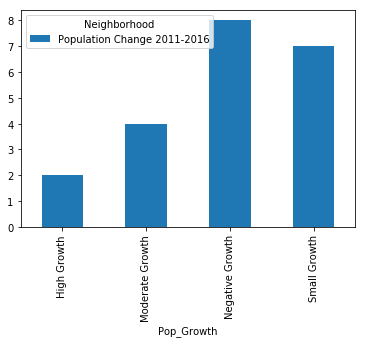

In [321]:
pop_growth1.plot (kind= "bar")

## Highest Growth North York Neighborhoods

In [332]:
#query for North York highest growth neighborhoods

growth_high = pop_growth1[pop_growth1['Pop_Growth'] == 'High Growth']
growth_high

Neighborhood,Pop_Growth,Neighborhood_Name,Population Change 2011-2016,Count
1,High Growth,Bayview Village,21.10%,1
6,High Growth,Henry Farm,38.70%,1


### There are two Neighborhoods, Bayview Village (21.10%), (index=39) and Henry Farm (38.70%), (index =33)with high growth.  Lets go back to the map of North York and see where they are located.

In [355]:
address = 'North York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.77
longitude = -79.46
print(latitude, longitude)

43.77 -79.46


#### Now that I have map of North York, I will select a neighborhood search for all venues within 500 miles of Victoria Village and bring back 500 results

In [359]:
#Bayview Village and Henery Farm

df_highest = df_postal_group[df_postal_group['Neighborhood'].isin (['Bayview Village','Fairview, Henry Farm, Oriole'])]

df_highest

,Borough,Neighborhood,Latitude,Longitude
33,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
39,North York,Bayview Village,43.786947,-79.385975


In [360]:
# create map of North York using its latitude and longitude values and markers for Bayview Village and Henery Farm

map_northyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map

for lat, lng, borough, neighborhood in zip(df_highest['Latitude'], df_highest['Longitude'], df_highest['Borough'], df_highest['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_northyork)  
    
map_northyork

### These neighborhoods are on opposite sides of North York.  Lets look at Four Square to see which neighborhood has the best venues close by.

## Venue Data Analysis

### lets look at 500 miles, limit 500 results for North York

#### I want to look at all North York and not the neighborhoods with the highest growth.  There may be neighborhoods that I may be overlooking and I don't want to bias my anlaysis

In [361]:
#foursquare credentials, version, 500 miles, limit 500

CLIENT_ID = 'OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O' # your Foursquare ID
CLIENT_SECRET = 'VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW' # your Foursquare Secret
VERSION = '20200801' # Foursquare API version
LIMIT = 500
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print (LIMIT)
print (radius)

Your credentails:
CLIENT_ID: OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O
CLIENT_SECRET:VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW
500
500


In [362]:
address = 'North York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.77
longitude = -79.46
print(latitude, longitude)

43.77 -79.46


In [363]:
#explore North York

latitude = 43.77
longitude = -79.46
borough_name = 'North York'

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of North York are 43.77, -79.46.


In [365]:
#create get request for URL for North York

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url




'https://api.foursquare.com/v2/venues/explore?&client_id=OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O&client_secret=VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW&v=20200801&ll=43.77,-79.46&radius=500&limit=500'

In [366]:
#get results as json

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f304f531aa323527d95a0dc'},
 'response': {'headerLocation': 'Bathurst Manor',
  'headerFullLocation': 'Bathurst Manor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.774500004500005,
    'lng': -79.45377999956749},
   'sw': {'lat': 43.7654999955, 'lng': -79.4662200004325}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50130907e4b0dbe157d5ae4a',
       'name': 'Finch Corridor Recreational Trail',
       'location': {'address': 'Finch Ave W',
        'lat': 43.7697605046851,
        'lng': -79.46134907740543,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.7697605046851,
          'lng': -79.46134907740543}],
        'distance': 111,
        'cc

#### Created a function to extract the categories of each venues

In [367]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


#### Pull all of the venues within 500 miles of North York

In [368]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name,lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [371]:
#neighborhoods with venues within 500 miles of North York
northyork_venues = getNearbyVenues(names=df_northyork['Neighborhood'],
                                   latitudes=df_northyork['Latitude'],
                                   longitudes=df_northyork['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale, Willowdale East
Downsview
York Mills West
Willowdale, Willowdale West


In [372]:
#check dataframe

print(northyork_venues.shape)
northyork_venues.head()

(237, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


## Venue Analysis

#### Now I can dig deeper in to the venues in the neigborhood and start to drill down.

In [373]:
#group venues by neighorhood and get a count of venues for each neighborhood

northyork_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",27,27,27,27,27,27
Don Mills,24,24,24,24,24,24
Downsview,15,15,15,15,15,15
"Fairview, Henry Farm, Oriole",64,64,64,64,64,64
Glencairn,4,4,4,4,4,4
Hillcrest Village,4,4,4,4,4,4
Humber Summit,1,1,1,1,1,1


#### I see from the table that there are more venues in Fairview, Henry Farm, Orieole (64) and Willowdale, Willowdale East (34).  Eventhough Bayview had the highest growth they only have 4 venues.  I can take Bayview off my list and look into the two neighborhoods with the most venues.  More venues = more foot traffic

## Drill into the Categories of each venue

#### There are certain specifications that I would like for my new resturant.  It needs to be close to a bakery, boutiques, cafes, small resturants, and coffoee and tea shops

In [374]:
# one hot encoding to display all of the venue categories by neighborhood.  

northyork_onehot = pd.get_dummies(northyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
northyork_onehot['Neighborhood'] = northyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [northyork_onehot.columns[-1]] + list(northyork_onehot.columns[:-1])
northyork_onehot = northyork_onehot[fixed_columns]

northyork_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [375]:
#examine shape

northyork_onehot.shape

(237, 102)

In [376]:
#group by neighborhood and take mean and freq. of each category

northyork_grouped = northyork_onehot.groupby('Neighborhood').sum().reset_index()
northyork_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant
0,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
1,Bayview Village,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Bedford Park, Lawrence Manor East",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0
3,Don Mills,0,0,0,1,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,Downsview,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [377]:
#shape of the table

northyork_grouped.shape

(18, 102)

## Bakeries

#### A bakery is a must, so I will look at the neighborhoods that have bakeries. As we see below there are only two neighborhoods that have bakeries. Index 5 and 11 and index 5 has 2 bakeries.

In [378]:
#neighborhoods with bakeries

northyork_grouped.Bakery

0     0
1     0
2     0
3     0
4     0
5     2
6     1
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
Name: Bakery, dtype: uint8

### Which neighborhoods have a bakery, boutique, coffoee shop and cafes.  A boutique and cafe are the next priority after a bakery.  

In [384]:
#find the neighborhood with a bakery, boutique, coffoee shop and cafes 

northyork_brunch = northyork_grouped.iloc[[5,11], [0, 8, 15, 24, 29]]
northyork_brunch

,Neighborhood,Bakery,Boutique,Café,Coffee Shop
5,"Fairview, Henry Farm, Oriole",2,1,0,5
11,"North Park, Maple Leaf Park, Upwood Park",1,0,0,0


## Brunch Location Found!

#### Fairview, Henry Farm, Orieole is one of the neighborhoods with the highest number of venues and also has two bakeries and boutique. Henry Farm is also the neighborhood with the highest growth! It doesn't have a cafe, but I also see that it doesn't have a breakfast spot.  I see that there are 5 coffoee shops in the area.  I will look more closely at Fairview, Henry Farm, Orieole - index 33 (df_northyork) is the same as index 5 (northyork_brunch)

In [398]:
#only Fairview, Henry Farm, Oriole Venues

northyork_venuesup = northyork_venues[northyork_venues['Neighborhood'] == 'Fairview, Henry Farm, Oriole']
northyork_venuesup.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
71,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
72,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall
73,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,New York Fries - Fairview Mall,43.778605,-79.343577,Restaurant
74,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Apple Fairview,43.777883,-79.343789,Electronics Store
75,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,SilverCity,43.778681,-79.344085,Movie Theater


In [402]:
#explore the neighborhood

neighborhood_latitude = 43.778517
neighborhood_longitude = -79.346556
radius = 200
LIMIT = 500

neighborhood_name = northyork_venuesup.loc[71, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
print (LIMIT)
print (radius)

Latitude and longitude values of Fairview, Henry Farm, Oriole are 43.778517, -79.346556.
500
200


### Explore Fairview, Henry Farm, Oriole

#### I will explore the neighborhood by looking at all venues within 200 miles, limit = 500

In [387]:
#create get request for URL for Fairview, Henry Farm, Oriole

url_brunch = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url_brunch

'https://api.foursquare.com/v2/venues/explore?&client_id=OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O&client_secret=VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW&v=20200801&ll=43.7785175,-79.3465557&radius=200&limit=500'

### Fairview, Henry Farm, Oriole Venues

In [403]:
#get results as json

results = requests.get(url_brunch).json()
results

{'meta': {'code': 200, 'requestId': '5f305795f39d6963a4ad1e1f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 43.7803175018, 'lng': -79.34406734543552},
   'sw': {'lat': 43.7767174982, 'lng': -79.34904405456447}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9413a4f964a5204f6634e3',
       'name': 'SilverCity',
       'location': {'address': '1800 Sheppard Ave E',
        'crossStreet': 'at Don Mills Rd',
        'lat': 43.77868093228815,
        'lng': -79.3440850072426,
        'labeledLatLngs': [{'label': 'display',
          'lat'

## Brunch Location Venue Exploration

#### Now that I have found a location in the Fairview, Henry Farm, Oriole neighborhood.  I need to see where the boutique, coffee shops and bakeries are located.

In [405]:
#brunch neighborhood

brunch_venues = getNearbyVenues(names=df_northyork['Neighborhood'],
                                   latitudes=df_northyork['Latitude'],
                                   longitudes=df_northyork['Longitude']
                                  )

brunch_venues = northyork_venuesup[northyork_venuesup['Venue Category'].isin(['Bakery', 'Coffee Shop', 'Boutique'])]

brunch_venues


Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale, Willowdale East
Downsview
York Mills West
Willowdale, Willowdale West


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
80,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
83,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Starbucks,43.777990,-79.344091,Coffee Shop
88,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
97,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.777964,-79.344715,Coffee Shop
98,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.774993,-79.346303,Coffee Shop
102,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.775249,-79.347740,Coffee Shop
112,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,BCBG Max Azria,43.776966,-79.347019,Boutique
134,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.774326,-79.346685,Bakery


### Further Exploration of the venues

#### The coffoee shops are chains - Starbucks and Tim Hortons.  There is one shop Aroma Espresso Bar that is a stand alone shop and there must be a mall nearby because of the boutique store..The bakery - Michel's Baguette has two locations.  Aroma Espresso Bar also serves brunch according to their website (aroma.ca)

In [406]:
#clean up the table

brunch_venues.rename(columns ={"Venue Latitude": "Lat", "Venue Longitude": "Lon", "Venue Category": "Category" }, inplace = True)
brunch_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Lat,Lon,Category
80,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
83,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Starbucks,43.777990,-79.344091,Coffee Shop
88,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
97,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.777964,-79.344715,Coffee Shop
98,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.774993,-79.346303,Coffee Shop
102,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.775249,-79.347740,Coffee Shop
112,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,BCBG Max Azria,43.776966,-79.347019,Boutique
134,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.774326,-79.346685,Bakery


##Fairview, Henry Farm, Oriole Further Exploration

####Now that we have drilled down with Fairview, Henry Farm, Oriole, lets see where these locations are in the city and where my resturant could possibly be located

In [407]:
#explore the neighborhood around the latitude and longitude of all the venues

neighborhood_latitude = df_northyork.loc[33, 'Latitude']
neighborhood_longitude = df_northyork.loc[33, 'Longitude']
radius = 200
LIMIT = 500

neighborhood_name = df_northyork.loc[33, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
print (LIMIT)
print (radius)

Latitude and longitude values of Fairview, Henry Farm, Oriole are 43.7785175, -79.3465557.
500
200


In [409]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map around the venues

# add the venues to the map
for lat, lng, label in zip(brunch_venues.Lat, brunch_venues.Lon, brunch_venues.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### looking at the map above I see that the majority of these locations are inside/near a shopping mall.  I decided to look outside of the mall and look at the locations.

## Narrowing Down Location

#### I created a table for Tim Hortons, Aroma Espresso Bar, and the bakeries by dropping the Starbucks and BCBG store

In [411]:
brunch_venues.drop(brunch_venues[brunch_venues['Venue'].isin (['Starbucks', 'BCBG Max Azria'])].index, inplace=True)
brunch_venues

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Lat,Lon,Category
80,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
88,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
97,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.777964,-79.344715,Coffee Shop
98,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.774993,-79.346303,Coffee Shop
102,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.775249,-79.347740,Coffee Shop
134,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.774326,-79.346685,Bakery


In [412]:
#reseting the index

best_location = brunch_venues.reset_index(drop=True)
best_location

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Lat,Lon,Category
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
1,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
2,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.777964,-79.344715,Coffee Shop
3,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.774993,-79.346303,Coffee Shop
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tim Hortons,43.775249,-79.347740,Coffee Shop
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.774326,-79.346685,Bakery


## Narrowing Down Location Further

#### I want to search around the Aroma Espresso Bar and see if its a good location around for a new brunch spot

In [413]:
#explore the neighborhood

neighborhood_latitude = 43.777700
neighborhood_longitude = -79.344652
radius = 5
LIMIT = 500

neighborhood_name = 'Best Location'

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
print (LIMIT)
print (radius)

Latitude and longitude values of Best Location are 43.7777, -79.344652.
500
5


In [414]:
#create get request for Aroma Espresso Bar

url_best = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude,
    radius, 
    LIMIT)

  
url_best

'https://api.foursquare.com/v2/venues/search?client_id=OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O&client_secret=VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW&v=20200801&ll=43.7777,-79.344652&radius=5&limit=500'

In [415]:
#get results as json

results = requests.get(url_best).json()
results

{'meta': {'code': 200, 'requestId': '5f3057c131e6642aa643cf86'},
 'response': {'venues': [{'id': '50bceb3ae4b01dc9b287cc99',
    'name': 'Aroma Espresso Bar',
    'location': {'address': '1800 Sheppard Ave. E',
     'crossStreet': 'in Fairview Mall',
     'lat': 43.777700197902725,
     'lng': -79.34465166972005,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.777700197902725,
       'lng': -79.34465166972005}],
     'distance': 0,
     'postalCode': 'M2J 5A7',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1800 Sheppard Ave. E (in Fairview Mall)',
      'Toronto ON M2J 5A7',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-159700418

### Research the Competition

#### With the venue id for Aroma Espresso Bar I can do some further research on the bar's ratings and foot traffic around the area.

In [416]:
venue_id = '50bceb3ae4b01dc9b287cc99'
comp_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
comp_url


'https://api.foursquare.com/v2/venues/50bceb3ae4b01dc9b287cc99?client_id=OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O&client_secret=VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW&v=20200801'

In [417]:
result = requests.get(comp_url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])


{'id': '50bceb3ae4b01dc9b287cc99',
 'name': 'Aroma Espresso Bar',
 'contact': {'phone': '4164923294',
  'formattedPhone': '(416) 492-3294',
  'twitter': 'aromaespresso'},
 'location': {'address': '1800 Sheppard Ave. E',
  'crossStreet': 'in Fairview Mall',
  'lat': 43.777700197902725,
  'lng': -79.34465166972005,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.777700197902725,
    'lng': -79.34465166972005}],
  'postalCode': 'M2J 5A7',
  'cc': 'CA',
  'city': 'Toronto',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['1800 Sheppard Ave. E (in Fairview Mall)',
   'Toronto ON M2J 5A7',
   'Canada']},
 'canonicalUrl': 'https://foursquare.com/v/aroma-espresso-bar/50bceb3ae4b01dc9b287cc99',
 'categories': [{'id': '4bf58dd8d48988d1e0931735',
   'name': 'Coffee Shop',
   'pluralName': 'Coffee Shops',
   'shortName': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'},
   'primary': True},
  {'id': '4bf58d

### Four Square has pulled all the information on Aroma Espresso Bar.  Now lets look at the rating!

In [418]:
try:
    print(result['response']['venue']['rating'])
  
except:
    print('This venue has not been rated yet.')

6.8


#### The bar has a rating of 6.8.. Thats not that good.

Lets look into any tips

In [419]:
result['response']['venue']['tips']['count']

6

#### We only have 6 tips... Lets dig deeper into them

In [420]:
## AromaTips

limit = 12
comp_url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(comp_url).json()
results

{'meta': {'code': 200, 'requestId': '5f305a16b0029033bd379b55'},
 'response': {'tips': {'count': 6,
   'items': [{'id': '52d20eb6498e6e16ac83f30e',
     'createdAt': 1389498038,
     'text': 'Coffee is really good. A little bit noisy, but still a nice place to relax in the mall.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/52d20eb6498e6e16ac83f30e',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 2,
     'disagreeCount': 0,
     'todo': {'count': 1},
     'user': {'id': '19400017',
      'firstName': 'Dimitri',
      'lastName': 'F',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/19400017-JJN3YXQXN1LZNVRC.jpg'}},
     'authorInteractionType': 'liked'}]}}}

In [421]:
#get tips and list of associated features

tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [422]:
#format tip output

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Coffee is really good. A little bit noisy, but still a nice place to relax in the mall.",2,0,52d20eb6498e6e16ac83f30e,Dimitri,F,NaN,19400017


#### Well it seems that Aroma Espresso Bar is in the mall and it looks like its a nice place but loud.  Others agreed.  I know there were 6 tips but only one was returned but it was a relevant one.

### Area Trending

#### To be sure we found the right location, lets look at the trends

In [423]:
# define URL
comp_url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(comp_url).json()
comp_url

'https://api.foursquare.com/v2/venues/trending?client_id=OKYDO4G5XQTPQBKEA1L2CKBSNVIVD1XX3G1QVMSB0L3HJW2O&client_secret=VNZ112X1ICLF5P4LGFILM3FRRFRDWOYYDZBNDCTR2ZAKF1DW&ll=43.77,-79.46&v=20200801'

In [424]:
results['response']['venues']

[]

#### There are no trending venues in the area.  That's neither good or bad.  I would have to physically be there to truly get a sense of the location.  Lets look at the demographics

## Demographics of Fairview, Henry Farm, Oriole

#### Aroma Espresso Bar is the closest brunch spot and it is not well liked, according to its ratings, 6.8/10 and the tips.  While it is not a perfect location, when I look back at the latest map of the neigborhood, there are lots that I could explore once I get to Canada. There is also not any trending venues in the area, so lets investigate the demographics of the area until I can catch a plane to Toronto, Canada.